In [97]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.spatial import cKDTree

In [57]:
# points: a,b,c - triangle, d - taget point
a = (3, 12)
b = (8, 1)
c = (17, 8)
d = (18, 5)

In [34]:
# pair vectors calculation function
def new_vec(a, b):
    return (b[0]-a[0], b[1]-a[1])

In [35]:
# calculate pair vectors
ab = new_vec(a, b)
bc = new_vec(b, c)
ca = new_vec(c, a)
ap = new_vec(a, d)
bp = new_vec(b, d)
cp = new_vec(c, d)

In [36]:
#cross products
abap = np.cross(ab, ap)
bcbp = np.cross(bc, bp)
cacp = np.cross(ca, cp)

In [37]:
if abap>0 and bcbp>0 and cacp>0:
    print('Point D is inside of polygon')
else:
    print('Point D is outside of polygon')

Point D is inside polygon


In [138]:
best_point = 0
best_distance = 999

for i in ([a, b], [b, c], [a, c]):
    x1, x2, y1, y2 = i[0][0], i[1][0], i[0][1], i[1][1]
    f = interp1d((x1, x2), (y1, y2))
    discretization = np.linspace(x1, x2, 1000)
    f = f(discretization)
    line = np.hstack([discretization.reshape(1000, 1), f.reshape(1000, 1)])
    tree = cKDTree(line)
    dd, ii = tree.query(d)
    if dd<best_distance:
        best_point = line[ii]
        best_distance = dd

Text(2.2,-2,'Nearest point is located at\n\nx = 16 and y = 7,\n\ndistance to it is 2.98')

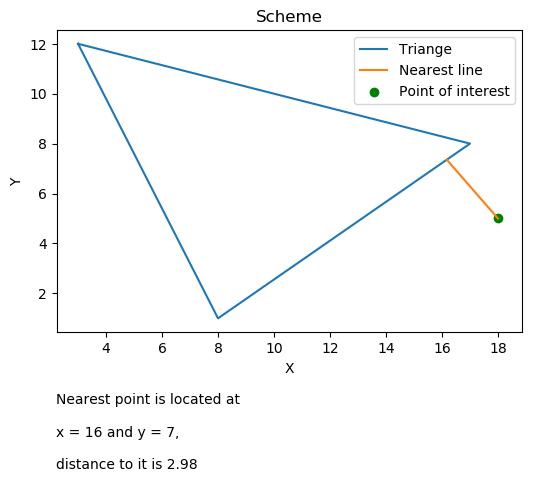

In [170]:
plt.figure(dpi=100)
plt.plot([a[0], b[0], c[0], a[0]], [a[1], b[1], c[1], a[1]], label='Triange')
plt.scatter(d[0], d[1], c='g', label='Point of interest')
plt.plot()
plt.plot([best_point[0], d[0]], [best_point[1], d[1]], label='Nearest line')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scheme')
plt.text(2.2, -2,
         'Nearest point is located at\n\nx = %s and y = %s,\n\ndistance to it is %s'%(
    int(best_point[0]),
    int(best_point[1]),
    round(best_distance, 2)),
        verticalalignment='top')